In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

import warnings


warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('sales_data_sample.csv',sep=",",encoding='Latin-1')
df.head(5)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [4]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [ ]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [5]:

df.shape

(2823, 25)

In [6]:
# concating MSRP and PRODUCT
df['MSRP_Product'] = df['MSRP'].astype(str) + df['PRODUCTCODE']

# dropping irrelevant columns
columns_to_drop = ['TERRITORY','STATE','ADDRESSLINE2','ADDRESSLINE1','PHONE','POSTALCODE',
                   'MSRP','PRODUCTCODE','CONTACTFIRSTNAME','CONTACTLASTNAME','ORDERDATE','ORDERNUMBER']
df.drop(columns=columns_to_drop, axis=1, inplace=True)

# changing datatypes from numeric to string 
df.QTR_ID = df.QTR_ID.astype(str)
df.MONTH_ID = df.MONTH_ID.astype(str)
df.YEAR_ID = df.YEAR_ID.astype(str)
df.ORDERLINENUMBER = df.ORDERLINENUMBER.astype(str)

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   QUANTITYORDERED  2823 non-null   int64  
 1   PRICEEACH        2823 non-null   float64
 2   ORDERLINENUMBER  2823 non-null   object 
 3   SALES            2823 non-null   float64
 4   STATUS           2823 non-null   object 
 5   QTR_ID           2823 non-null   object 
 6   MONTH_ID         2823 non-null   object 
 7   YEAR_ID          2823 non-null   object 
 8   PRODUCTLINE      2823 non-null   object 
 9   CUSTOMERNAME     2823 non-null   object 
 10  CITY             2823 non-null   object 
 11  COUNTRY          2823 non-null   object 
 12  DEALSIZE         2823 non-null   object 
 13  MSRP_Product     2823 non-null   object 
dtypes: float64(2), int64(1), object(11)
memory usage: 308.9+ KB


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   QUANTITYORDERED  2823 non-null   int64  
 1   PRICEEACH        2823 non-null   float64
 2   ORDERLINENUMBER  2823 non-null   object 
 3   SALES            2823 non-null   float64
 4   STATUS           2823 non-null   object 
 5   QTR_ID           2823 non-null   object 
 6   MONTH_ID         2823 non-null   object 
 7   YEAR_ID          2823 non-null   object 
 8   PRODUCTLINE      2823 non-null   object 
 9   CUSTOMERNAME     2823 non-null   object 
 10  CITY             2823 non-null   object 
 11  COUNTRY          2823 non-null   object 
 12  DEALSIZE         2823 non-null   object 
 13  MSRP_Product     2823 non-null   object 
dtypes: float64(2), int64(1), object(11)
memory usage: 308.9+ KB


In [10]:
pip install kmodes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


###### K-Prototype Implementation

In [11]:
# setting up the algorithm
from kmodes.kprototypes import KPrototypes

In [12]:
df_num = df[list(df.describe().columns)]

In [14]:
df_cat= df[['ORDERLINENUMBER','STATUS',
       'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'PRODUCTLINE', 'CUSTOMERNAME', 'CITY',
       'COUNTRY', 'DEALSIZE', 'MSRP_Product']]

In [15]:
# tranforming categorical labels to numerical labels
encoders = {}
for col_name in df_cat.columns:
    series = df_cat[col_name]
    label_encoder = LabelEncoder()
    df_cat[col_name] = pd.Series(label_encoder.fit_transform(series[series.notnull()]),
    index=series[series.notnull()].index
                                )
    encoders[col_name]=label_encoder

In [16]:
df_tf = pd.concat([df_cat,df_num], axis=1)

In [17]:
# tranform data for PCA
pca = PCA(2)
df_pca = pca.fit_transform(df_tf)
df_pca.shape

(2823, 2)

In [18]:
# decode categorical data back

for i in df_cat.columns:
    df_tf[i]=df_tf[i].astype(int)
for col_name in df_cat.columns:
    df_tf[col_name] = encoders[col_name].inverse_transform(df_tf[col_name])

In [19]:
df_tf

,ORDERLINENUMBER,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,CUSTOMERNAME,CITY,COUNTRY,DEALSIZE,MSRP_Product,QUANTITYORDERED,PRICEEACH,SALES
0,2,Shipped,1,2,2003,Motorcycles,Land of Toys Inc.,NYC,USA,Small,95S10_1678,30,95.70,2871.00
1,5,Shipped,2,5,2003,Motorcycles,Reims Collectables,Reims,France,Small,95S10_1678,34,81.35,2765.90
2,2,Shipped,3,7,2003,Motorcycles,Lyon Souveniers,Paris,France,Medium,95S10_1678,41,94.74,3884.34
3,6,Shipped,3,8,2003,Motorcycles,Toys4GrownUps.com,Pasadena,USA,Medium,95S10_1678,45,83.26,3746.70
4,14,Shipped,4,10,2003,Motorcycles,Corporate Gift Ideas Co.,San Francisco,USA,Medium,95S10_1678,49,100.00,5205.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,15,Shipped,4,12,2004,Ships,Euro Shopping Channel,Madrid,Spain,Small,54S72_3212,20,100.00,2244.40
2819,1,Shipped,1,1,2005,Ships,"Oulu Toy Supplies, Inc.",Oulu,Finland,Medium,54S72_3212,29,100.00,3978.51
2820,4,Resolved,1,3,2005,Ships,Euro Shopping Channel,Madrid,Spain,Medium,54S72_3212,43,100.00,5417.57
2821,1,Shipped,1,3,2005,Ships,Alpha Cognac,Toulouse,France,Small,54S72_3212,34,62.24,2116.16


In [20]:
# Get position of categorical columns
CatColumnsPos = [df_tf.columns.get_loc(col) for col in list(df_tf.select_dtypes('object').columns)]

print('categorical columns: {}'.format(list(df_tf.select_dtypes('object').columns)))
print('categorical column position:{}'.format(CatColumnsPos))

categorical columns: ['ORDERLINENUMBER', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'PRODUCTLINE', 'CUSTOMERNAME', 'CITY', 'COUNTRY', 'DEALSIZE', 'MSRP_Product']
categorical column position:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [21]:
# Convert the dataframe to matric
dfMatrix = df_tf.to_numpy()

###### implementing K-Prototype

In [22]:
cost = []
for cluster in range(1,10):
    try:
        kprototype = KPrototypes(n_jobs=-1, n_clusters = cluster, init='Huang', random_state=0)
        kprototype.fit_predict(dfMatrix, categorical= CatColumnsPos)
        cost.append(kprototype.cost_)
        print('cluster initiation: {}'.format(cluster))
    except:
        break

cluster initiation: 1
cluster initiation: 2
cluster initiation: 3
cluster initiation: 4
cluster initiation: 5
cluster initiation: 6
cluster initiation: 7
cluster initiation: 8
cluster initiation: 9


<function matplotlib.pyplot.show>

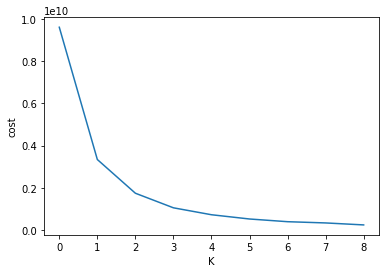

In [23]:
plt.plot(cost)
plt.xlabel('K')
plt.ylabel('cost')
plt.show

In [25]:
pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
from kneed import KneeLocator
cost_knee_c3 = KneeLocator(
            x=range(1,10),
            y=cost,
            S=0.1, curve="convex",direction="decreasing",online=True)

K_cost_c3 = cost_knee_c3.elbow
print("elbow at k =", f'{K_cost_c3:.0f} clusters')

elbow at k = 3 clusters


In [31]:
#Building the model
kprototype = KPrototypes(n_jobs=-1, n_clusters = 3, init='Huang', random_state=0)
df_tf['clusters']=kprototype.fit_predict(dfMatrix, categorical = CatColumnsPos)

In [32]:
label = kprototype.fit_predict(dfMatrix, categorical = CatColumnsPos)
print(label)

[2 2 0 ... 0 2 2]


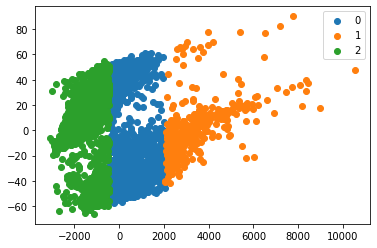

In [33]:
# getting the unique labels
u_labels = np.unique(label)

#plotting the results

for i in u_labels:
    plt.scatter(df_pca[label==i,0], df_pca[label==i,1], label = i)
plt.legend()
plt.show()

### Analysis

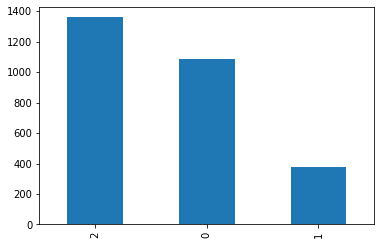

In [34]:

df_tf['clusters'].value_counts().plot(kind='bar')

In [35]:
df_tf.groupby(['clusters']).mean()

,QUANTITYORDERED,PRICEEACH,SALES
clusters,,,
0,37.195772,95.103851,4129.479513
1,44.610667,99.893680,7088.066293
2,30.786029,70.025699,2118.919324


In [36]:
df_tf.groupby(['clusters']).agg(lambda x: pd.Series.mode(x).iat[0])[['ORDERLINENUMBER','STATUS',
       'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'PRODUCTLINE', 'CUSTOMERNAME', 'CITY',
       'COUNTRY', 'DEALSIZE', 'MSRP_Product']]

,ORDERLINENUMBER,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,CUSTOMERNAME,CITY,COUNTRY,DEALSIZE,MSRP_Product
clusters,,,,,,,,,,,
0,1,Shipped,4,11,2004,Classic Cars,Euro Shopping Channel,Madrid,USA,Medium,169S18_3232
1,3,Shipped,4,11,2004,Classic Cars,Euro Shopping Channel,Madrid,USA,Medium,169S18_3232
2,2,Shipped,4,11,2004,Classic Cars,Euro Shopping Channel,Madrid,USA,Small,57S24_1444
